# 机器学习示例
darui 19/08


## 0.载入sklearn工具包

In [7]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
import numpy as np
import pandas 
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [125]:
from sklearn import preprocessing
# load libraries
import pandas
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn import tree
from sklearn import metrics
from sklearn import linear_model 
from sklearn import naive_bayes 
from sklearn.svm import SVC
from sklearn import preprocessing
import time
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA


In [124]:
from sklearn.model_selection import cross_validate

## 1. 数据前处理
## 1.1 载入数据

In [95]:
X = pandas.read_csv("features.csv",dtype='float16')
Y  = pandas.read_csv("labels.csv")   
print(X.info(memory_usage=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38519 entries, 0 to 38518
Data columns (total 9 columns):
power             38519 non-null float16
range             38519 non-null float16
angle             38519 non-null float16
velocity          38519 non-null float16
status_1          38519 non-null float16
status_2          38519 non-null float16
status_3          38519 non-null float16
status_4          38519 non-null float16
weak detection    38519 non-null float16
dtypes: float16(9)
memory usage: 677.2 KB
None


## 1.2 探索数据分析 (exploratory data analysis)
### 1.2.1 看看datasize

In [86]:
# training set
print ("Training set:")
n_data  = len(features)
# exclude first colum ID and last column label (substract 2)
n_features = features.shape[1]
# number of satisfied customers
n_all = len(labels) 
# number of dissatisfied customers
n_1 = np.sum(labels)
n_1 = n_1['labels']
sat_rate = 100.0*n_1/n_all
print ("# data: {}".format(n_all))
print ("# features: {}".format(n_features))
print ("# passed: {}".format(n_1))
print ("% failure rate: {:.3f}%".format(sat_rate))

Training set:
# data: 38519
# features: 9
# passed: 8263
% failure rate: 21.452%


### 1.2.2 看看数据的统计数值

In [97]:
## summary
X.describe()

,power,range,angle,velocity,status_1,status_2,status_3,status_4,weak detection
count,3.851900e+04,38519.0000,38519.000000,3.851900e+04,38519.000000,38519.000000,38519.000000,38519.000000,38519.000000
mean,inf,inf,0.577637,-inf,0.495117,0.098755,0.101379,0.304932,0.057953
std,7.804688e+00,inf,7.808594,1.756250e+01,0.500000,0.298340,0.301758,0.460449,0.233643
min,3.050000e+01,0.0000,-36.843750,-8.193750e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.700000e+01,37.0625,-2.800781,-1.742188e+01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.200000e+01,76.3750,0.399902,-7.320312e+00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.750000e+01,127.4375,3.650391,-4.199219e-01,1.000000,0.000000,0.000000,1.000000,0.000000
max,8.450000e+01,618.5000,33.562500,8.193750e+01,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
Y.describe()

,power,range,angle,velocity,status_1,status_2,status_3,status_4,weak detection
count,38519.000000,38519.000000,38519.000000,38519.000000,38519.000000,38519.000000,38519.000000,38519.000000,38519.000000
mean,52.683208,102.321735,0.578047,-7.799162,0.495002,0.098730,0.101327,0.304940,0.057945
std,7.805274,93.259543,7.811847,17.561186,0.499982,0.298304,0.301765,0.460388,0.233643
min,30.500000,0.000000,-36.850000,-81.920000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,37.070000,-2.800000,-17.420000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52.000000,76.400000,0.400000,-7.320000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,57.500000,127.430000,3.650000,-0.420000,1.000000,0.000000,0.000000,1.000000,0.000000
max,84.500000,618.610000,33.550000,81.910000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.2.3 看看data分布

Text(0, 0.5, '# of features')

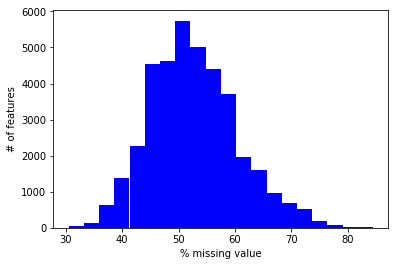

In [92]:
# The distribution of features with missing values
plt.hist(features.power,20,facecolor='b')
plt.xlabel("% missing value")
plt.ylabel("# of features")

### 1.2.4. 数据正态

In [101]:
# normalized
scaler = preprocessing.MinMaxScaler() # max min scaling
X_n = scaler.fit_transform(X) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype float16 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [ ]:
1.2 分配train 和text data

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8)

In [143]:
# Define scoring function (performance metrics)
def score_model(clf):
    print ("\nClassifier: {}...".format(clf.__class__.__name__))
    start = time.time()
    # use 3-fold CV
    scores = cross_validate(clf, X_train, Y_train, scoring='accuracy', cv=3) 
    end = time.time()
    print ("time (secs): {:.3f}".format(end - start))
    print ("roc_auc: {:.3f}".format(scores.mean()))

In [145]:
clf = tree.DecisionTreeClassifier()

In [146]:
scores = cross_validate(clf, X_train, Y_train, scoring='accuracy', cv=3) 

In [152]:
np.mean(scores['test_score'])

0.8729065711820411

In [144]:
# Compare different algrithem
scores = {}
# Decision Tree
scores['tree'] = score_model(tree.DecisionTreeClassifier()) 
# naive bayes
#scores['gaussian'] = score_model(naive_bayes.GaussianNB())



Classifier: DecisionTreeClassifier...
time (secs): 0.163


AttributeError: 'DeprecationDict' object has no attribute 'mean'

In [153]:
%whos

Variable                 Type                      Data/Info
------------------------------------------------------------
AdaBoostClassifier       ABCMeta                   <class 'sklearn.ensemble.<...>ting.AdaBoostClassifier'>
DecisionTreeClassifier   ABCMeta                   <class 'sklearn.tree.tree<...>.DecisionTreeClassifier'>
GridSearchCV             ABCMeta                   <class 'sklearn.model_sel<...>on._search.GridSearchCV'>
KFold                    ABCMeta                   <class 'sklearn.model_selection._split.KFold'>
LogisticRegression       type                      <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
PCA                      ABCMeta                   <class 'sklearn.decomposition.pca.PCA'>
PLSRegression            ABCMeta                   <class 'sklearn.cross_dec<...>tion.pls_.PLSRegression'>
RandomForestClassifier   ABCMeta                   <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
SVC                      ABCMeta               

In [ ]:
# 调参 grid search

In [ ]:
# 通过learning curve 判断overfit 或 underfit

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(source_X, Y, test_size = 0.5)

In [ ]:
df_train = pandas.read_csv("train.csv")
df_test  = pandas.read_csv("test.csv")   
print("Data loaded")

In [ ]:
#1.1 载入数据
1.2探索数据分析 exporaty data analyis
看看datasize
1.3 看卡data分布
1.4. normal

2. 归一化（normalization）

In [ ]:
2. 数据训练
1
1.定义模型
2

In [2]:
v = open("train_vectors.csv")
source_X = pd.read_csv(v)
l = open("train_labels.csv")
source_Y = pd.read_csv(l)

In [ ]:
探索数据分析 exporaty data analyis

In [4]:
train_X, test_X, train_Y, test_Y = train_test_split(source_X, source_Y, test_size = 0.5)
LR = LogisticRegression()
scores = cross_val_score(LR, source_X, source_Y.values.ravel(), cv = 5, scoring = 'recall')
print(scores.mean())

RF = RandomForestClassifier()
scores = cross_val_score(RF, source_X, source_Y.values.ravel(), cv = 5, scoring = 'recall')
print(scores.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.6072752746858379


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

0.5687876177878946
